# *Feature Detector and Descriptor: Detect, Extract, Describe and Matching* bagian 2

Pada pembahasan yang kedua ini, saya akan coba menjelaskan beberapa metode *Feature Detector and Descriptor* yang sudah sangat populer, seperti SIFT, SURF, BRISK dan lain-lain. Beberapa metode ini sudah dipatenkan sehingga untuk dapat menggunakan metode ini, pastikan kalian sudah menginstall opencv-contrib dari link [berikut](https://www.scivision.co/install-opencv-python-windows/).

*Feature Detector and Descriptor* merupakan salah satu metode yang digunakan untuk mengambil sebuah fitur pada citra dengan melihat dari *pixel-pixel* tetanggannya. *Interest point* atau fitur ini biasa disebut dengan *keypoints*. Seperti yang dijelaskan pada *Panduan Visi Komputer*, metode *Feature Detector and Descriptor* ini terbagi menjadi dua kategori yakni:

1. *Sparse descriptor*
2. *Dense descriptor*

Pertama yang perlu diperhatikan adalah metode ini berada pada modul *cv2.xfeatures2d* (Bisa kalian lihat dari link [berikut](https://github.com/opencv/opencv_contrib/tree/master/modules/xfeatures2d)). Beberapa metode sudah tersedia selain pada versi contrib. Versi contrib hanya mengandung metode-metode yang sudah dipatenkan.

## 1. *Sparse Descriptor*

Langkah-langkah pada kategori ini adalah:
1. mencari kandidat *keypoint* pada *local patch* dengan menggunakana *image pyramid* seperti *Difference of Gaussian*
2. melakukan seleksi kandidat *keypoint* (opsional)
3. ekstraksi fitur dari titik *keypoint*
4. mendeskripsikan fitur dalam bentuk vektor

contoh dari *sparse descriptor* dijelaskan beberapa dibawah ini(semua tersedia pada *Opencv*)

### 1.1 SIFT (*Scale Invariant Features Transform*)

Disini saya hanya akan menjelaskan bagaimana cara menggunakan metode SIFT dari opencv. Untuk lebih jelasnya bagaimana algoritme ini bekerja atau *pseudocode*nya bisa membuka buku *Panduan Visi Komputer*.



Untuk mengimplementasikannya:

```python
cv2.xfeatures2d.SIFT(nfeatures=None, nOctaveLayers=None, contrastThreshold=None, edgeThreshold=None, sigma=None)
```

Method tersebut mempunyai beberapa parameter antara lain:
1. nfeatures = jumlah fitur yang ingin diambil berdasarkan peringkatnya
2. nOctaveLayers = jumlah layer pada masing-masing octave
3. contrastThreshold = nilai ambang batas untuk menyeleksi kandidat fitur yang berada dilokasi *low-contrast*. Semakin besar nilainya, maka semakin sedikit fitur yang lolos
4. edgeThreshold = nilai ambang batas untuk menyeleksi kandidat fitur yang berada ditepi
5. sigma = merupakan nilai sigma yang diaplikan pada *gaussian weighting*

Untuk implementasinya seperti berikut ini:

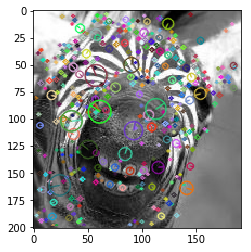

In [1]:
import cv2
import matplotlib.pyplot as plt 

img = cv2.imread("Asset/gambar.jpg", 0) 
# Citra yang dapat diproses hanya pada citra dengan 1 channel

sift_descriptor = cv2.xfeatures2d.SIFT_create()

keypoints = sift_descriptor.detect(img, None)
# Digunakan untuk mencari keypoints dari citra yang diberikan

img_draw = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_draw)
plt.show()
# Hasilnya zebra kece!

*Informasi apa aja sih yang ada di keypoints itu?*

Langkahnya adala sebagai berikut: 
1. Yang perlu kita ketahui adalah tipe datanya terlebih dahulu.
2. Jika *keypoints* tersebut adalah *list* maka kita perlu mengambil salah satunya saja. Sebagai contoh indeks ke-0 saja yang kita ambil. Jika *keypoints* bukan merupakan *list* maka kita bisa langsung melakukan *inspect* terhadap variabel tersebut.

In [2]:
print("tipe data: ",type(keypoints))
# Hasilnya list. Sekarang coba akses elemen pertamanya atau indeks ke-0
print("tipe data indeks-0", type(keypoints[0]))
# Oke hasilnya cv2.Keypoint. Sekarang bisa dilakukan inspect

import inspect # Untuk melakukan inspect terhadap kelas atau objek
# Baris dibawah ini akan menampilkan setiap atribut pada kelas atau objek yang di-inspect
# dimana yang ditampilkan bukanlah built-in method atau method-wrapper
# yang biasanya dimulai dengan tanda __ (double underscore). Contoh: __str__
[(atribut) for atribut in inspect.getmembers(keypoints[0]) if not(atribut[0].startswith('__') and atribut[0].endswith('__'))]

# Di luar notebook, gunakan yang dibawah ini
# [print (atribut) for atribut in inspect.getmembers(keypoints[0]) if not(atribut[0].startswith('__') and atribut[0].endswith('__'))]

tipe data:  <class 'list'>
tipe data indeks-0 <class 'cv2.KeyPoint'>


[('angle', 177.704345703125),
 ('class_id', -1),
 ('octave', 4719103),
 ('pt', (102.3184585571289, 4.7026286125183105)),
 ('response', 0.020043525844812393),
 ('size', 1.9168967008590698)]

Dari informasi yang diperoleh, atribut tersebut dapat digunakan untuk hal yang lain jika mau. Keterangan atributnya adalah sebagai berikut:
1. angle = merupakan orientasi dari keypoint tersebut
2. class_id = digunakan jika keypoint perlu di *clustering*. Jika tidak, semua *keypoint* bernilai -1
3. octave = nilai pada octave ke berapa *keypoint* tersebut diekstraksi
4. pt = lokasi (x,y) tempat *keypoint* tersebut diekstraksi
5. response = respon dari *keypoint*. Urutan *keypoint* yang dihasilkan berdasarkan nilai respon yang paling besar
6. size = nilai diameter *keypoint*

Untuk informasi *keypoint* yang dijelaskan di atas silahkan digunakan sebaik mungkin. Untuk penggunaan dari SIFT akan dirangkum pada berkas *Digital Image Processing-3*

### 1.2 SURF (*Speeded-Up Robust Features*)

Sama seperti SIFT, disini saya hanya akan menjelaskan cara menggunakan metode SURF yang sudah disediakan oleh OpenCV.

```python
cv2.xfeatures2d.SURF_create(hessianThreshold=None, nOctaves=None, nOctaveLayers=None, extended=None, upright=None)
```

Berikut adalah penjelasan dari masing-masing parameter:
1. hessianThreshold = merupakan nilai ambang batas untuk menyeleksi *keypoint* berdasarkan nilai determinan dari matriks *hessian*. Berbeda dengan SIFT yang bisa menentukan berapa jumlah dari *keypoint* yang dibutuhkan, SURF merupakan metode yang mengekstraksi banyak *keypoint*.
2. nOctaves =  jumlah octaves yang digunakan
3. nOctaveLayers = jumlah layer pada masing-masing octave
4. extended = merupakan flag untuk deskriptor. Jika diisi True, maka akan menghasilkan 128-*element descriptors*, jika False maka akan menghasilkan 64-*element descriptors*
5. upright = bernilai False jika ingin fitur memiliki rotasi, bernilai True jika tidak ingin ada orientasi pada fitur

Untuk implementasinya adalah sebagai berikut:

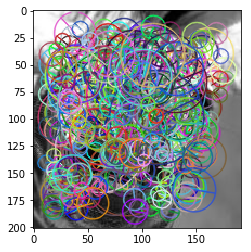

In [3]:
surf_descriptor = cv2.xfeatures2d.SURF_create()

keypoints = surf_descriptor.detect(img, None)
# Digunakan untuk mencari keypoints dari citra yang diberikan

img_draw = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_draw)
plt.show()
# Hasilnya seperti kumpulan karet!

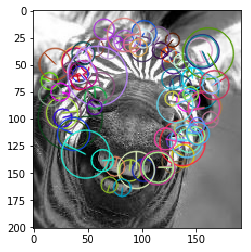

In [4]:
# Karena menghasilkan banyak keypoint, maka kita berikan threshold pada nilai hessian matriksnya
surf_descriptor = cv2.xfeatures2d.SURF_create(hessianThreshold=5000)

keypoints = surf_descriptor.detect(img, None)
# Digunakan untuk mencari keypoints dari citra yang diberikan

img_draw = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_draw)
plt.show()
# Hasilnya tampak lebih sedikit keypoints

Untuk melihat isi dari masing-masing keypoint, bisa menggunakan kode berikut:
```python
for kp in keypoints:
    [print(n) for n in inspect.getmembers(kp) if not(n[0].startswith('__') and n[0].endswith('__'))]
```

Silahkan dicoba sendiri untuk penggunakan masing-masing parameter yang sudah dijelaskan di atas.


### 1.3 FAST (*Features from Accelerated Segment Test*)

Metode FAST juga termasuk sebagai metode deskriptor *interest point* yang disediakan oleh OpenCV. Berbeda dengan SIFT dan SURF, FAST tersedia selain dari versi contrib. FAST sering digunakan karena komputasinya yang lebih sederhana dibanding SIFT.

Berikut adalah cara mengimplementasikannya:
```python
cv2.FastFeatureDetector_create(threshold=None, nonmaxSuppression=None, type=None)
```
Masing-masing parameternya berfungsi sebagai berikut:
1. threshold = nilai ambang batas yang digunakan untuk dibandingkan dengan *pixel* tetangganya
2. nonmaxSuppression = bernilai False atau True. True, maka *non-maximum suppression* akan dijalankan. False untuk sebaliknya
3. type = jumlah *pixel* tetangga. Nilai yang bisa diinputkan cv2.FastFeatureDetector_TYPE_5_8, cv2.FastFeatureDetector_TYPE_7_12, cv2.FastFeatureDetector_TYPE_9_16 atau 0, 1, 2

Di bawah ini adalah contoh dari implementasinya:

Threshold:  30
nonmaxSuppression:  True
neighborhood:  1
Total Keypoints with nonmaxSuppression:  453


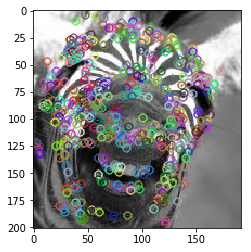

In [5]:
fast_desc = cv2.FastFeatureDetector_create(threshold=30,nonmaxSuppression=120, type=cv2.FAST_FEATURE_DETECTOR_TYPE_7_12)

keypoints_fast = fast_desc.detect(img, None)

print ("Threshold: ", fast_desc.getThreshold())
print ("nonmaxSuppression: ", fast_desc.getNonmaxSuppression())
print ("neighborhood: ", fast_desc.getType())
print ("Total Keypoints with nonmaxSuppression: ", len(keypoints_fast))

img_draw = cv2.drawKeypoints(img, keypoints_fast, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_draw)
plt.show()
# Sedikit menyeramkan!

### 1.4 BRIEF (*Binary Robust Independent Elementary Features*)

BRIEF merupakan metode deskriptor *interest point* yang menggunakan *binary strings*. Untuk implementasi pada OpenCV, *library* ini hanya menyediakan fungsi untuk menghitung berdasarkan set *keypoint* yang sudah ada. Bisa menggunakan metode *detect* dari SIFT, SURF, FAST atau yang lain.
Sekilas, perbedaan metode *detect* dengan *compute* adalah metode *detect* hanya mendeteksi posisi dari *keypoint* serta artibutnya (arah, respon, diameter dan octave). Sedangkan metode *compute* digunakan untuk membuat sebuah deskripsi. Nilai yang diberikan adalah *keypoint* dan deskripsinya. Fungsi dari deskripsi ini digunakan pada proses *matching* yang akan dijelaskan pada *notebook* ketiga.

Untuk mengimplementasikannya:

```python
cv2.xfeatures2d.BriefDescriptorExtractor_create(bytes=None, use_orientation=None)
```
Masing-masing parameternya berfungsi sebagai berikut:
1. bytes = *bytes* pada *binary strings* yang digunakan. Nilai yang dapat digunakan adalah 16, 32, dan 64
2. use_orientation = bernilai False jika tidak menggunakan orientasi dan True jika sebaliknya

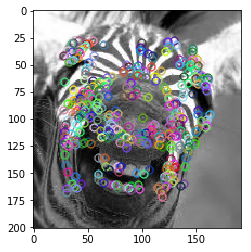

In [6]:
brief_desc = cv2.xfeatures2d.BriefDescriptorExtractor_create()

keypoints_brief, desc_brief = brief_desc.compute(img, keypoints_fast)

img_draw = cv2.drawKeypoints(img, keypoints_brief, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_draw)
plt.show()

# Hilangkan tanda tagar jika ingin melihat hasil dari deskriptor dan keypointnya
# print("Descriptors")
# for index,des in enumerate(desc_brief):
#    print(index, " ", des)

#print("Keypoints")
#for index, kp in enumerate(keypoints_brief):
#    print(index," ", sep=' ', end='', flush=True)
#    [print("\t",n) for n in inspect.getmembers(kp) if not(n[0].startswith('__') and n[0].endswith('__'))]


### 1.5 ORB (*Oriented FAST and Rotated BRIEF*)
ORB merupakan kombinasi FAST dan BRIEF yang telah diperbaiki sehingga membuatnya lebih *invariant* terhadap rotasi. ORB ini tidak lain adalah fusi dari kedua metode tersebut dan bukan metode yang dipatenkan sehingga dapat diperoleh tanpa menggunakan modul contrib. *Improvement* yang diberikan juga lebih baik dari keduanya. Penjelasan lebih jelas ada pad abuku *Panduan Visi Komputer*. Berikut adalah cara mengimplementasikan ORB pada Python menggunakan OpenCV.

Untuk mengimplementasikannya:
```python
cv2.ORB_create(nfeatures=None, scaleFactor=None, nlevels=None, edgeThreshold=None, firstLevel=None, WTA_K=None, scoreType=None, patchSize=None, fastThreshold=None)
```
Masing-masing parameternya berfungsi sebagai berikut:
1. nfeatures = jumlah (maksimal) fitur yang ingin diambil
2. scaleFactor = faktor perubaha skala pada *image pyramid* (nilai > 1, setiap *level* punya nilai\* 2 *pixel* lebih sedikit dari *level* sebelumnya). Semakin besar nilai faktor skala maka akan menurunkan skor pemadanan (*matching score*). Jika semakin kecil maka membutuhkan jumlah piramid yang banyak serta komputasi yang lama
3. nlevels = jumlah *level* pada pyramid
4. edgeThreshold = ukuran tepi dimana lokasi tersebut tidak akan dianggap sebagai fitur
5. firstLevel = selalu bernilai 1
6. WTA_K = jumlah titik yang diambil dari bin *oriented* BRIEF. Titik ini diambil secara acak dengan *seed* yang telah ditentukan sebelumnya. Nilai yang bisa digunakan adalah 2, 3, 4 
7. scoreType = algoritme yang digunakan untuk melakukan *ranking* fitur. Secara default menggunakan algoritme Harris (```cv2.ORB_HARRIS_SCORE```). Bisa juga menggunakan algoritme FAST yang lebih cepat komputasinya namun kurang stabil (```cv2.ORB_FAST_SCORE```)
8. patchSize = ukuran *patch* yang digunakan oleh *oriented* BRIEF. Harus berkorespondensi dengan ```edgeThreshold```
9. fastThreshold = nilai ambang batas yang digunakan untuk metode FAST

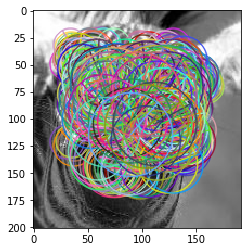

In [7]:
orb_decs = cv2.ORB_create()

keypoints_orb = orb_decs.detect(img)

img_draw = cv2.drawKeypoints(img, keypoints_orb, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_draw)
plt.show()

### 1.6 BRISK (*Binary Robust Invariant Scalable Keypoints*)
BRISK merupakan salah satu metode deskriptor *interest point* yang dimana pembentuk deskriptornya adalah kumpulan dari lingkaran. Pada BRISK terdapat *short pairs* dan *long pairs*. *Short pairs* digunakan untuk menentukan orientasi dimana *short pairs* merupakan pasangan dari titik sample yang mempunyai jarak dibawah nilai ambang batas maksimal (*max distance threshold*). Sedangkan *long pairs* digunakan untuk membandingkan intensitas. Nilai ambang batas pada *long pairs* berbeda dengan *short pairs* sehingga tidak ada *short pairs* diantara *long pairs*. Berbeda dengan BRIEF dan ORB yang menggunakan FAST, BRISK menggunakan AGAST (*Adaptive and Generic Accelerated Segment Test*)

Untuk mengimplementasikannya:
```python
cv2.BRISK_create(thresh=None, octaves=None, patternScale=None)
```
Masing-masing parameternya berfungsi sebagai berikut:
1. thresh = nilai ambang batas yang digunakan untuk AGAST
2. octaves = Jumlah octaves yang dibutuhkan. Jumlah octave menentukan skala
3. patternScale = skala yang digunakan saat *sampling*

Secara default, nilai thresh = 30, octaves = 30 dan patternScale = 1.0

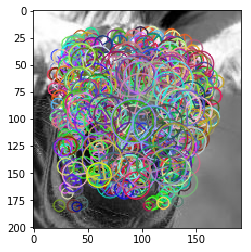

In [8]:
brisk_decs = cv2.BRISK_create()

keypoints_brisk = brisk_decs.detect(img)

img_draw = cv2.drawKeypoints(img, keypoints_brisk, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_draw)
plt.show()

### 1.7 FREAK (*Fast Retina Keypoint*)
deskriptor FREAK merupakan sebuah algoritme memiliki intuisi mengekstraksi *keypoint* seperti cara kerja pengelihatan manusia (khususnya seperti cara retina bekerja). Sama seperti BRISK, FREAK menggunakan *binary string* dimana *binary string* tersebut diproduksi dengan cara membandingkan instensitas citra berdasarkan *retina sampling pattern*. Penulis dari FREAK ini mengklaim bahwa algoritmenya lebih baik dari SURF, SIFT dan BRISK. Pada OpenCV, algoritme FREAK ada pada versi contribnya.

Untuk mengimplementasikannya:
```python
cv2.xfeatures2d.FREAK_create(orientationNormalized=None, scaleNormalized=None, patternScale=None, nOctaves=None, selectedPairs=None)
```

Masing-masing parameternya memiliki fungsi sebagai berikut:
1. orientationNrmalized = bernilai True maka orientasi dari deskriptornya akan dinormalisasi, False maka sebaliknya
2. scaleNormalized = skala yang dihasilkan akan dinormalisasi jika bernilai True, False maka sebaliknya
3. patternScale = mengatur penskalaan pola deskriptor
4. nOctaves = jumlah octave
5. selectedPairs = bersifat opsional dimana pasangan yang dipilih ditentukan oleh pengguna

Secara default, nilai orientationNormalization = True, scaleNormalized = True, patternScale = 22.0, nOctaves = 4 dan selectedPairs disediakan sendiri.

<span style="color:red"> Sayangnya, untuk metode FREAK ini hanya disediakan operasi *compute*nya saja dari OpenCV. Oleh karena itu perlu menggunakan *keypoints* dari metode lain. Pada contoh ini menggunakan *keypoints* dari BRISK (Hasilnya akan berbeda jika menggunakan *keypoints* dari yang lain). Jika digunakan maka akan muncul pesan galat berikut:</span>

```python
OpenCV Error: The function/feature is not implemented () 
```


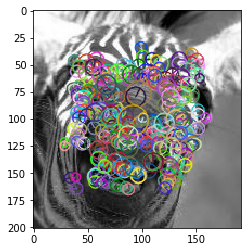

In [9]:
freak_decs = cv2.xfeatures2d.FREAK_create()
keypoints_freak, desc = freak_decs.compute(img,keypoints_brisk)

img_draw = cv2.drawKeypoints(img, keypoints_freak, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_draw)
plt.show()

### 1.7 DAISY
DAISY, deskriptor yang telah dipatenkan ini bekerja dengan mengubah *patch local* citra ke dimensi yang lebih rendah dan invarian sehingga dapat digunakan untuk pemadanan (*matching*) dan klasifikasi. Algoritme DAISY ini diklaim lebih baik daripada SIFT. DAISY ada pada versi contrib.

Untuk mengimplementasikannya:
```python
cv2.DAISY_create(radius=None, q_radius=None, q_theta=None, q_hist=None, norm=None, H=None, interpolation=None, use_orientation=None)
```

Masing-masing parameternya memiliki fungsi sebagai berikut:
1. radius = nilai radius dari deskriptor
2. q_radius = jumlah rentang radial
3. q_theta = jumlah rentang jarak
4. q_hist = jumlah dari variasi orientasi gradien
5. norm = tipe normalisasi. NIlai yang bisa digunakan adalah cv2.xfeatures2d.DAISY_NRM_FULL, cv2.xfeatures2d.DAISY_NRM_NONE, cv2.xfeatures2d.DAISY_NRM_PARTIAL, cv2.xfeatures2d.DAISY_NRM_SIFT.
6. H = matriks homografi berdimensi 3x3. Bersifat opsional
7. interpolation = menggunakan interpolasi jika True, False maka sebaliknya
8. use_orientation = menggunakan orientasi pada *keypoints*

secara default, nilai radius = 15, q_radius = 3, q_theta = 8, q_hist = 8, norm = cv2.xfeatures2d.DAISY_NRM_NONE, H = tidak dipakai, interpolation = True, use_orientation = False.



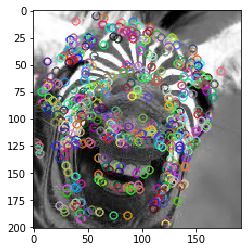

In [10]:
daisy_decs = cv2.xfeatures2d.DAISY_create()
keypoints_daisy, des = daisy_decs.compute(img, keypoints_fast)

img_draw = cv2.drawKeypoints(img, keypoints_daisy, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_draw)
plt.show()

### 1.8 GFTT (*Good Feature To Track*)
Merupakan salah satu metode *Feature Detector and Descriptor* yang sudah lama. Sekitar tahun 1994.  Metode ini merupakan pengembangan dari metode *Newton-Raphson* yang bekerja pada citra yang ditransformasi. 

Untuk mengimplementasikannya:
```python
cv2.GFTTDetector_create(maxCorners=None, qualityLevel=None, minDistance=None, blockSize=None, useHarrisDetector=None, k=None)
```

Masing-masing parameternya memiliki fungsi sebagai berikut:
1. maxCorners = nilai maksimal dari sudut terkuat yang akan dikembalikan
2. qualityLevel = merupakan tingkat kualitas dari sudut yang dicari. Nilai ini akan dikalikan dengan nilai *quality measure* (yang merupakan nilai *eigenvalues* yang kecil atau nilai respon dari *Harris Corner*). Nilai yang dibawah hasil perkalian tersebut akan dibuang
3. minDistance = nilai minimum dari *Euclidean distance*
4. blockSize =  ukuran dari *block* yang akan digunakan untuk membentuk matriks kovarian turunan dari *pixel* ketetanggan
5. useHarrisDetector = opsi untuk menggunakan *Harris detector* atau *small Eigenvalues corner*
6. k = parameter yang digunakan pada *Harris detector*

secara default, maxCorners = 23, qualityLevel = 0.01, minDistance = 10, blockSize = 3, useHarrisCorner = False, k = 0.04

GFTT ini juga dapat digunakan sebagai *corner detector*.

```python
cv2.goodFeaturesToTrack(image, maxCorners, qualityLevel, minDistance, corners=None, mask=None, blockSize=None, useHarrisDetector=None, k=None)
```

Dengan mask merupakan region yang akan diekstraksi.

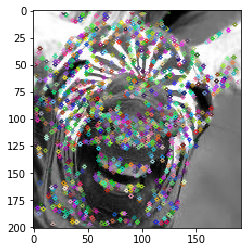

In [11]:
gftt_desc = cv2.GFTTDetector_create()
keypoints_gftt = gftt_desc.detect(img)

img_draw = cv2.drawKeypoints(img, keypoints_gftt, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_draw)
plt.show()

### 1.9 KAZE 
Metode KAZE menggunakan pendekatan *nonlinear diffusion* (atau *nonlinear partial differential equations* (PDEs)) untuk mendeskripsikan perubahan pencahayaan dari sebuah citra dengan meningkatkan tingkatan skala. Secara garis besar, pendekatan untuk menghasilkan *keypoint* dari KAZE sama seperti SIFT. KAZE menggunakan *Adaptive Operator Splitting* (AOS) untuk membentuk ruang *nonlinear scale*.

Untuk mengimplementasikannya:

```python
cv2.KAZE_create(extended=None, upright=None, threshold=None, nOctaves=None, nOctaveLayers=None, diffusivity=None)
```

Masing-masing parameternya memiliki fungsi sebagai berikut:
1. extended = hanya dikhususkan untuk membuat deskriptor 128-byte
2. upright = membuat deskriptor menjadi invarian atau tidak invarian terhadap rotasi
3. threshold = nilai ambang batas dari diterimanya sebuah *keypoint*
4. nOctaves = jumlah maksimal dari octave pada citra
5. nOctaveLayers = jumlah tingkatan pada masing-masing octave
6. diffusivity = nilai persebaran. Nilai yang dapat digunakan adalah cv2.KAZE_DIFF_PM_G1, cv2.KAZE_DIFF_PM_G2, cv2.KAZE_DIFF_WEICKERT dan cv2.KAZE_DIFF_CHARBONNIER

secara default, nilai extended = False, upright = False, threshold = 0.0010000000474974513, nOctaves = 4, nOctaveLayers = 4, diffusivity = cv2.KAZE_DIFF_PM_G2

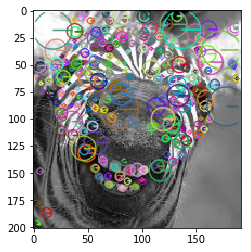

In [12]:
kaze_desc = cv2.KAZE_create()
keypoints_kaze = kaze_desc.detect(img)

img_draw = cv2.drawKeypoints(img, keypoints_kaze, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_draw)
plt.show()

### 1.10 AKAZE (*Accelerated-KAZE*)
Merupakan pengembangan dari metode KAZE dimana AKAZE menggunakan *Fast Explicit Diffusion* (FED) pada *image pyramid* sehingga mempercepat deteksi fitur pada ruang *nonlinear scale*. AKAZE menggunakan deskriptor *Modified-Local Difference Binary* (M-LDB) yang dapat menentukan apakah fitur atau *keypoint* tersebut invarian terhadap perubahan skala dan rotasi.

Untuk mengimplementasikannya:
```python
cv2.AKAZE_create(descriptor_type=None, descriptor_size=None, descriptor_channels=None, threshold=None, nOctaves=None, nOctaveLayers=None, diffusivity=None)
```
Masing-masing parameternya memiliki fungsi sebagai berikut:
1. descriptor_type = merupakan tipe dari deskriptor. Nilai yang dapat digunakan adalah cv2.AKAZE_DESCRIPTOR_KAZE, cv2.AKAZE_DESCRIPTOR_KAZE_UPRIGHT, cv2.AKAZE_DESCRIPTOR_MLDB dan cv2.AKAZE_DESCRIPTOR_MLDB_UPRIGHT
2. descriptor_size = ukuran dari deskriptor dalam bit
3. descriptor_channels = jumlah *channel* pada deksriptor (1, 2 atau 3)
4. threshold = nilai ambang batas dari diterimanya sebuah *keypoint*
5. nOctaves = jumlah maksimal dari octave pada citra
6. nOctaveLayers = jumlah tingkatan pada masing-masing octave
7. diffusivity = nilai persebaran. Nilai yang dapat digunakan adalah cv2.KAZE_DIFF_PM_G1, cv2.KAZE_DIFF_PM_G2, cv2.KAZE_DIFF_WEICKERT dan cv2.KAZE_DIFF_CHARBONNIER


Secara default, nilai descriptor_type = cv2.AKAZE_DESCRIPTOR_MLDB, desriptor_size = 0, descriptor_channels = 3 , threshold = 0.0010000000474974513, nOctaves = 4, nOctaveLayers = 4, diffusivity = cv2.KAZE_DIFF_PM_G2

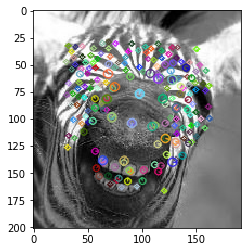

In [13]:
akaze_desc = cv2.AKAZE_create()
keypoints_akaze = akaze_desc.detect(img)

img_draw = cv2.drawKeypoints(img, keypoints_akaze, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_draw)
plt.show()

### 1.11 STAR 